Following the [`theano` Tutorial](http://deeplearning.net/software/theano/tutorial/index.html)

In [9]:
%matplotlib inline  

In [1]:
from theano import *
import theano.tensor as T

## Baby Steps - Algebra
### Adding two Scalars

In [2]:
import numpy
from theano import function

In [3]:
x = T.dscalar('x')
y = T.dscalar('y')
z = x+y
f = function([x,y],z)

In [7]:
print type(x), type(y), type(z), type(f) # good to know what these 
# new classes are in theano

<class 'theano.tensor.var.TensorVariable'> <class 'theano.tensor.var.TensorVariable'> <class 'theano.tensor.var.TensorVariable'> <class 'theano.compile.function_module.Function'>


In [8]:
f(2,3)

array(5.0)

In [9]:
numpy.allclose(f(16.3,12.1),28.4)

True

In [10]:
x.type

TensorType(float64, scalar)

In [11]:
T.dscalar

TensorType(float64, scalar)

In [12]:
x.type is T.dscalar

True

"Prefer constructors like `matrix, vector` and `scalar` to `dmatrix, dvector` and `dscalar` because the former will give you `float32` variables when `floatX=float32`." - cf. [Using the GPU Theano tutorial](http://deeplearning.net/software/theano/tutorial/using_gpu.html)

In [13]:
xf = T.scalar('xf')
yf = T.scalar('yf')
zf = xf + yf
ff = function([xf,yf],zf)

In [14]:
from theano import pp

In [15]:
print(pp(z))

(x + y)


In [16]:
print(pp(zf))

(xf + yf)


In [17]:
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x + y 
f = function([x,y],z)

In [18]:
f([[1,2],[3,4]], [[10,20],[30,40]])

array([[ 11.,  22.],
       [ 33.,  44.]])

In [19]:
f(numpy.array([[1,2],[3,4]]),numpy.array([[10,20],[30,40]]))

array([[ 11.,  22.],
       [ 33.,  44.]])

In [20]:
xf = T.matrix('xf')
xy = T.matrix('yf')
zf = xf + yf
ff = function([xf,yf],zf)

In [22]:
ff([[1,2],[3,4]], [[10,20],[30,40]])

TypeError: ('Bad input argument to theano function with name "<ipython-input-20-f711db7fb599>:4"  at index 1(0-based)', 'Wrong number of dimensions: expected 0, got 2 with shape (2, 2).')

Adding exercise 1, cf. http://deeplearning.net/software/theano/tutorial/adding.html

In [25]:
a = theano.tensor.vector()
b = theano.tensor.vector()
out = a**2 + b**2 + 2 * a * b
f = theano.function([a,b],out)
print(f([1,2],[4,5]))

[ 25.  49.]


"At this point it would be wise to begin familiarizing yourself more systematically with Theano’s fundamental objects and operations by browsing this section of the library: [Basic Tensor Functionality](http://deeplearning.net/software/theano/library/tensor/basic.html#libdoc-basic-tensor)." cf. [More Examples](http://deeplearning.net/software/theano/tutorial/examples.html)

### Custom tensor types

In [28]:
dtensor5 = T.TensorType('float64', (False,)*5)

In [29]:
x = dtensor5()
z = dtensor5('z')

In [32]:
my_dmatrix = T.TensorType('float64', (False,)*2)
x = my_dmatrix()
my_dmatrix == T.dmatrix

True

### Converting from Python Objects

In [33]:
x = shared(numpy.random.randn(3,4))

Back to More Examples... http://deeplearning.net/software/theano/tutorial/examples.html

In [34]:
x = T.dmatrix('x')
s = 1 / ( 1 + T.exp(-x))
logistic = theano.function([x],s)
logistic([[0,1],[-1,-2]])

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

\begin{gathered}
s(x) = \frac{1}{1+\exp{-x} } = \frac{1+\tanh{(x/2) } }{2}
\end{gathered}

In [35]:
s2 = (1 + T.tanh(x/2))/2
logistic2 = theano.function([x],s2)
logistic2([[0,1],[-1,-2]])

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

## Computing More than one Thing at the Same Time (!!!)

In [36]:
a,b = T.dmatrices('a','b')
diff = a-b
abs_diff = abs(diff)
diff_squared = diff**2
f = theano.function([a,b],[diff,abs_diff,diff_squared])

In [37]:
f([[1,1],[1,1]], [[0,1],[2,3]])

[array([[ 1.,  0.],
        [-1., -2.]]), array([[ 1.,  0.],
        [ 1.,  2.]]), array([[ 1.,  0.],
        [ 1.,  4.]])]

## Setting a Default Value for an Argument

In [38]:
from theano import In
from theano import function
x,y = T.dscalars('x','y')
z = x + y
f= function([x,In(y,value=1)],z)

In [39]:
f(33)

array(34.0)

In [40]:
f(33,2)

array(35.0)

"Inputs with default values must follow inputs without default values (like Python’s functions). There can be multiple inputs with default values. These parameters can be set positionally or by name, as in standard Python:"

In [42]:
x,y,w = T.dscalars('x', 'y', 'w')
z = (x+y)*w
f = function([x,In(y,value=1),In(w,value=2,name='w_by_name')],z)
f(33)

array(68.0)

In [43]:
f(33,2)

array(70.0)

In [44]:
f(33,0,1)

array(33.0)

In [45]:
f(33,w_by_name=1)

array(34.0)

In [46]:
f(33,w_by_name=1,y=0)

array(33.0)

## Using Shared Variables

In [47]:
from theano import shared
state = shared(0)
inc = T.iscalar('inc')
accumulator = function([inc],state,updates=[(state,state+inc)])

In [48]:
print(state.get_value())

0


In [49]:
accumulator(1)

array(0)

In [50]:
print(state.get_value())

1


In [51]:
accumulator(300)

array(1)

In [52]:
print(state.get_value())

301


"It is possible to reset the state.  Just use the `.set_value()` method:"

In [53]:
state.set_value(-1)

In [54]:
accumulator(3)

array(-1)

In [55]:
print(state.get_value())

2


In [56]:
decrementor = function([inc],state, updates=[(state,state-inc)])

In [57]:
decrementor(2)

array(2)

In [58]:
print(state.get_value())

0


"Also, Theano has more control over where and how shared variables are allocated, which is one of the important elements of getting good performance on the GPU."

In [60]:
fn_of_state = state * 2 + inc
# The type of foo must match the shared variable we are replacing
# with the "givens"
foo = T.scalar(dtype=state.dtype)
skip_shared = function([inc,foo], fn_of_state, givens=[(state,foo)])
skip_shared(1,3)

array(7)

In [61]:
print(state.get_value())

0


## Copying functions

In [64]:
inc = T.iscalar('inc')
accumulator = theano.function([inc],state, updates=[(state,state+inc)])
accumulator(10)

array(0)

In [65]:
print(state.get_value())

10


"We can use `copy()` to create a similar accumulator but with its own internal state using the swap parameter, which is a dictionary of shared variables to exchange:"

In [66]:
new_state = theano.shared(0)
new_accumulator = accumulator.copy(swap={state:new_state})
new_accumulator(100)

[array(0)]

In [67]:
print(new_state.get_value())

100


In [68]:
print(state.get_value())

10


In [69]:
null_accumulator = accumulator.copy(delete_updates=True)
null_accumulator(9000)

UnusedInputError: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 0 is not part of the computational graph needed to compute the outputs: inc.
To make this error into a warning, you can pass the parameter on_unused_input='warn' to theano.function. To disable it completely, use on_unused_input='ignore'.

In [70]:
print(state.get_value())

10


## Using Random Numbers

In [71]:
from theano.tensor.shared_randomstreams import RandomStreams
from theano import function
srng = RandomStreams(seed=234)
rv_u = srng.uniform((2,2)) # represents a random stream of 2x2 matrices
rv_n = srng.normal((2,2))
f = function([], rv_u)
g = function([], rv_n, no_default_updates=True) # Not updating rv_n.rng
nearly_zeros = function([],rv_u+rv_u - 2 * rv_u)

"The RandomStream only work on the CPU, MRG31k3p work on the CPU and GPU. CURAND only work on the GPU." cf. http://deeplearning.net/software/theano/tutorial/examples.html#other-implementations

In [74]:
from theano.sandbox.rng_mrg import MRG_RandomStreams

In [76]:
from theano.sandbox.cuda import CURAND_RandomStreams

In [77]:
f_val0 = f()

In [78]:
f_val1 = f()

"When we add the extra argument `no_default_updates=True` to function (as in `g`), then the random number generator state is not affected by calling the returned function. So, for example, calling `g` multiple times will return the same numbers."

In [79]:
g_val0 = g() # different numbers from f_val0 and f_val1

In [80]:
g_val1 = g()

"An important remark is that a random variable is drawn at most once during any single function execution. So the nearly_zeros function is guaranteed to return approximately 0 (except for rounding error) even though the `rv_u` random variable appears three times in the output expression."

### Seeding Streams

In [82]:
rng_val = rv_u.rng.get_value(borrow=True) # Get the ring for rv_u
rng_val.seed(89234) # seeds the generator
rv_u.rng.set_value(rng_val, borrow=True) # Assign back seeded rng

In [83]:
srng.seed(902340) # seeds rv_u and rv_n with different seeds each

### Sharing Streams Between Functions

In [84]:
state_after_v0 = rv_u.rng.get_value().get_state()

In [85]:
nearly_zeros()  # this affects rv_u's generator

array([[ 0.,  0.],
       [ 0.,  0.]])

In [86]:
v1 = f()
rng = rv_u.rng.get_value(borrow=True)
rng.set_state(state_after_v0)
rv_u.rng.set_value(rng,borrow=True)

In [87]:
v2 =f() # v2 != v1

In [88]:
v3=f() # v3 == v1

In [90]:
v2.view()

array([[ 0.33919835,  0.85344878],
       [ 0.14881562,  0.79659413]])

In [91]:
v1.view()

array([[ 0.5025809 ,  0.99544429],
       [ 0.75073355,  0.17926032]])

In [92]:
v3.view()

array([[ 0.5025809 ,  0.99544429],
       [ 0.75073355,  0.17926032]])

### Copying Random State Between Theano Graphs

In [93]:
from __future__ import print_function
from theano.sandbox.rng_mrg import MRG_RandomStreams
from theano.tensor.shared_randomstreams import RandomStreams

In [94]:
class Graph():
    def __init__(self, seed=123):
        self.rng = RandomStreams(seed)
        self.y = self.rng.uniform(size=(1,))

In [96]:
g1 = Graph(seed=123)
f1 = theano.function([], g1.y)
g2 = Graph(seed=987)
f2 = theano.function([], g2.y)

# By default, the two functions are out of sync.
f1()

array([ 0.72803009])

In [97]:
f2()

array([ 0.55056769])

In [98]:
def copy_random_state(g1,g2):
    if isinstance(g1.rng, MRG_RandomStreams):
        g2.rng.rstate = g1.rng.rstate
    for (su1, su2) in zip(g1.rng.state_updates, g2.rng.state_updates):
        su2[0].set_value(su1[0].get_value())

In [99]:
# We now copy the state of the theano random number generators.
copy_random_state(g1, g2)
f1()

array([ 0.59044123])

In [100]:
f2()

array([ 0.59044123])

### Other Random Distributions

are found here at [other distributions implemented](http://deeplearning.net/software/theano/library/tensor/raw_random.html#libdoc-tensor-raw-random)

# A Real Example: Logistic Regression


In [101]:
import numpy
import theano
import theano.tensor as T
rng = numpy.random

N = 400      # training sample size
feats = 784  # number of input variables

# generate a dataset: D = (input_values, target_class)
D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))
training_steps = 10000

# Declare Theano symbolic variables
x = T.dmatrix("x")
y = T.dvector("y")

# initialize the weight vector w randomly
#
# this and the following bias variable b
# are shared so they keep their values
# between training iterations (updates)
w = theano.shared(rng.randn(feats), name="w")

# initialize the bias term
b = theano.shared(0., name="b")

print("Initial model:")
print(w.get_value())
print(b.get_value())

# Construct Theano expression graph
p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))  # Probability that target =  1
prediction = p_1 > 0.5                   # The prediction thresholded
xent = -y * T.log(p_1) - (1-y * T.log(1-p_1)) # Cross-entropy loss function
cost = xent.mean() + 0.01 * ( w** 2).sum() # The cost to minimize
gw, gb = T.grad(cost, [w,b])             # Compute the gradient of the cost
                                    # w.r.t weight vector w and 
                                     # bias term b
                                    # (we shall return to this in a 
                                    # following section of this tutorial)

# Compile
train = theano.function(
            inputs=[x,y],
            outputs=[prediction, xent],
            updates=((w,w-0.1 *gw), (b,b-0.1 * gb)))
predict = theano.function(inputs=[x], outputs=prediction)

# Train
for i in range(training_steps):
    pred, err = train(D[0], D[1])
    
print("Final model:")
print(w.get_value())
print(b.get_value())
print("target values for D:")
print(D[1])
print("prediction on D:")
print(predict(D[0]))

                
                


Initial model:
[  1.02090375e+00   8.73947142e-01   1.95614041e+00   7.07377428e-01
  -6.53816172e-01   7.42545996e-01  -9.80754517e-01   5.61128882e-01
   1.78775715e+00   2.55831279e-01  -8.67444321e-02   7.94001501e-01
  -6.70527935e-01  -1.96668538e+00   2.54200412e+00   8.89567452e-01
   9.74970709e-01   8.48005589e-01  -6.09636316e-01   8.50633037e-01
   1.68271257e+00   4.93346994e-01  -5.51691867e-02   2.37368331e-01
   1.62746146e-01   1.55918000e+00  -8.34594814e-01   1.38944861e+00
  -1.23368104e+00  -3.93048716e-01   1.05566395e+00  -1.31731246e+00
   7.08793200e-01  -2.69903059e-01   1.59489513e+00  -5.41472996e-01
  -1.51657778e+00  -1.74491648e+00  -4.87264078e-01  -1.40829581e+00
   9.16277590e-01   1.13288831e-01  -8.15545784e-01   3.63391354e-01
   4.59170798e-01  -4.92534498e-01   1.59924371e-01  -5.79592495e-01
   8.28797390e-01   1.01823000e+00   9.47734065e-01   1.07973174e+00
   4.30089731e-02  -8.06497075e-02   8.95636221e-01  -1.18478568e-02
  -5.81466361e-01  

## [Derivatives in Theano](http://deeplearning.net/software/theano/tutorial/gradients.html)

### Computing Gradients

In [1]:
import numpy
import theano
import theano.tensor as T
from theano import pp

For this 

$
\begin{gathered}
\frac{d (x^2) }{ dx} = 2 \cdot x     
\end{gathered}
$


In [2]:
x = T.dscalar('x')
y = x ** 2
gy = T.grad(y,x)
pp(gy) # print out the gradient prior to optimization

'((fill((x ** TensorConstant{2}), TensorConstant{1.0}) * TensorConstant{2}) * (x ** (TensorConstant{2} - TensorConstant{1})))'

`fill((x ** 2), 1.0)` means to make a matrix of the same shape as `x ** 2 ` and fill it with `1.0`

In [3]:
f = theano.function([x],gy)
f(4)

array(8.0)

In [4]:
numpy.allclose(f(94.2), 188.4)

True

### A plot of the gradient of the logistic function, with x on the x-axis and $ds(x)/dx$ on the y-axis

In [6]:
x = T.dmatrix('x')
s = T.sum(1 / (1 + T.exp(-x)))
gs = T.grad(s, x)
dlogistic = theano.function([x], gs)
dlogistic([[0, 1], [-1, -2]])

array([[ 0.25      ,  0.19661193],
       [ 0.19661193,  0.10499359]])

### Computing the Jacobian

In [7]:
x = T.dvector('x')
y = x ** 2
J, updates = theano.scan(lambda i, y, x: T.grad(y[i], x), sequences=T.arange(y.shape[0]), non_sequences=[y,x] )
f = theano.function([x], J, updates=updates)
f([4, 4])

array([[ 8.,  0.],
       [ 0.,  8.]])

### Computing the Hessian

In [8]:
x = T.dvector('x')
y = x ** 2
cost = y.sum()
gy = T.grad(cost, x)
H, updates = theano.scan(lambda i, gy, x : T.grad(gy[i], x), sequences=T.arange(gy.shape[0]), non_sequences=[gy, x] )
f = theano.function([x], H, updates=updates)
f([4,4])

array([[ 2.,  0.],
       [ 0.,  2.]])

### R-operator

In [9]:
W = T.dmatrix('W')
V = T.dmatrix('V')
x = T.dvector('x')
y = T.dot(x,W)
JV = T.Rop(y, W, V)
f = theano.function([W,V,x],JV)
f([[1,1], [1,1]],[[2,2],[2,2]],[0,1])

array([ 2.,  2.])

### L-operator

In [10]:
W = T.dmatrix('W')
v = T.dvector('v')
x = T.dvector('x')
y = T.dot(x,W)
VJ = T.Lop(y,W,v)
f = theano.function([v,x],VJ)
f([2,2],[0,1])

array([[ 0.,  0.],
       [ 2.,  2.]])

### Hessian times a Vector

In [11]:
x = T.dvector('x')
v = T.dvector('v')
y = T.sum(x ** 2)
gy = T.grad(y, x)
vH = T.grad(T.sum( gy * v), x)
f= theano.function([x,v], vH)
f([4,4], [2,2])

array([ 4.,  4.])

or, making use of the *R-operator*:

In [12]:
x = T.dvector('x')
v = T.dvector('v')
y = T.sum( x ** 2)
gy = T.grad(y,x)
Hv = T.Rop(gy, x, v)
f = theano.function([x,v], Hv)
f([4,4],[2,2])

array([ 4.,  4.])

## Conditions

In [13]:
from theano import tensor as T
from theano.ifelse import ifelse
import theano, time, numpy

a,b = T.scalars('a','b')
x,y = T.matrices('x','y')

In [14]:
z_switch = T.switch(T.lt(a,b), T.mean(x), T.mean(y))
z_lazy   = ifelse(T.lt(a, b), T.mean(x), T.mean(y))

# logistic regression on the GPU

cf. [Using the GPU - Theano documentation](http://deeplearning.net/software/theano_versions/dev/tutorial/using_gpu.html)   
[Solution for the GPU implementation](http://deeplearning.net/software/theano_versions/dev/_downloads/using_gpu_solution_1.py)

In [3]:
rng = numpy.random

In [4]:
N=400
feats=784


In [5]:
D = (rng.randn(N, feats).astype(theano.config.floatX), rng.randint(size=N,low=0, high=2).astype(theano.config.floatX))

In [11]:
print(D[0].shape); D[0]

(400, 784)


array([[-0.51540321,  0.45720622, -1.07207155, ..., -0.14092861,
        -1.29015946,  0.79136688],
       [ 0.41795   ,  0.58462614, -0.13168216, ...,  0.65973812,
        -0.46558085, -0.15008399],
       [ 0.09026403, -1.53019106, -0.43091467, ...,  0.42072779,
         0.85275686, -2.31214309],
       ..., 
       [ 1.0708015 , -1.14941835,  2.08980322, ..., -0.02039757,
        -0.42613024, -1.25479817],
       [-1.50268137, -0.1785637 , -1.19366574, ...,  0.53540504,
        -0.3872523 ,  1.20521164],
       [ 0.76399541,  0.65020931, -1.35631859, ...,  0.5690015 ,
         0.69514877,  0.35484901]], dtype=float32)

In [10]:
print(D[1].shape); D[1]

(400,)


array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1

In [8]:
training_steps = 10000

In [12]:
# Declare Theano symbolic variables
x = theano.shared(D[0], name="x")
y = theano.shared(D[1], name="y")
w = theano.shared(rng.randn(feats).astype(theano.config.floatX),name="w")
b = theano.shared(numpy.asarray(0., dtype=theano.config.floatX),name="b")

In [13]:
# Setting the tag.test_value attribute gives the variable its test value, i.e.
# provide Theano with a default test-value
x.tag.test_value = D[0]
y.tag.text_value = D[1]

In [17]:
# Construct Theano expression graph
p_1 = 1 / ( 1+ T.exp( - T.dot( x,w) - b)) # Probabilty of having a 1
prediction = p_1 > 0.5  # the prediction that is done: 0 or 1
xent = -y * T.log(p_1) - (1-y) * T.log(1-p_1) # Cross-entropy
cost = T.cast( xent.mean(), theano.config.floatX) +  0.01 * (w ** 2).sum()  # the cost to optimize
gw, gb = T.grad(cost, [w,b])

In [18]:
# compile exprression to functions
train = theano.function( 
                        inputs=[],
                        outputs=[prediction, xent],
                        updates=[(w, w - 0.01 * gw), (b, b - 0.01 * gb)],
                        name="train")
predict = theano.function(inputs=[], outputs=prediction, name="predict")

In [20]:
if any([n.op.__class__.__name__ in ['Gemv', 'CGemv', 'Gemm', 'CGemm'] for n in train.maker.fgraph.toposort()]):
    print('Used the cpu')

In [22]:
# elif
if any([n.op.__class__.__name__ in ['GpuGemm', 'GpuGemv'] for n in train.maker.fgraph.toposort()]):
    print('Used the gpu')

Used the gpu


In [23]:
for i in range(training_steps):
    pred, err = train()

In [29]:
print("target values for D")
print(D[1])

target values for D
[ 0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.
  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.  1.
  1.  0.  1.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.
  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.
  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.
  1.  0.  0.  1.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  0.
  0.  1.  1.  0.  1.  0.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  1.
  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.
  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  1.
  0.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.  1.  1.
  1.  1.  0.  0.  1.  0.  0.  0

In [32]:
print("prediction on D")
print(predict().astype(theano.config.floatX))

prediction on D
[ 0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.
  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.  1.
  1.  0.  1.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.
  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.
  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.
  1.  0.  0.  1.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  0.
  0.  1.  1.  0.  1.  0.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  1.
  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.
  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  1.
  0.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.  1.  1.
  1.  1.  0.  0.  1.  0.  0.  0.  0

# `scan` - Looping in Theano

In [39]:
print(y.get_value().shape)
y.get_value()

(400,)


array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1

## Simple loop with accumulation: computing $A^k$

In [9]:
import numpy as np

In [60]:
k = theano.shared(np.int32(1),"k")
A = theano.shared(np.array(range(10)),"A")

In [61]:
result, updates = theano.scan(fn=lambda prior_result, A: prior_result * A, 
                                 outputs_info=T.ones_like(A),
                                 non_sequences=A,
                                 n_steps=k)

In [62]:
result, updates = theano.scan(fn=lambda prior_result, A: prior_result * A, 
                                 outputs_info=T.ones_like(A),
                                 non_sequences=A,
                                 n_steps=2)

In [63]:
final_result = result[-1]

In [64]:
power=theano.function(inputs=[A,k], outputs=final_result, updates=updates)

TypeError: Cannot use a shared variable (A) as explicit input. Consider substituting a non-shared variable via the `givens` parameter

In [65]:
power=theano.function(inputs=[],outputs=final_result, updates=updates)

In [66]:
power()

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [67]:
power()

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [68]:
A.get_value()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
result, updates = theano.scan(fn=lambda prior_result, A: prior_result * A, 
                                 outputs_info=T.ones_like(A),
                                 non_sequences=A,
                                 n_steps=k)

In [70]:
power=theano.function(inputs=[],outputs=final_result, updates=updates)

In [71]:
power()

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [72]:
k.get_value()

array(1, dtype=int32)

In [76]:
k.set_value( np.int32(3) )

In [77]:
power()

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

From this link, [Loop](http://deeplearning.net/software/theano/tutorial/loop.html), which for some reason a Google search overlooks most of the time, I then found this 
cf. [good ipython notebook with explanation and more examples](https://github.com/lamblin/ccw_tutorial/blob/master/Scan_W2016/scan_tutorial.ipynb), a `scan` tutorial written by Pierre Luc Carrier   

### Example 1 : As simple as it gets

In [19]:
import numpy as np

In [20]:
from theano import sandbox

In [21]:
X1 = T.vector('vector1')
X2 = T.vector('vector2')

The parameter `fn` receives a function or lambda expression that expresses computation to do at every iteration.  

Since we wish to iterate over both `X1` and `X2` simultaneously, provide them as sequences.  This means that every iteration will operate on 2 inputs; an element from `X1` and the corresponding element from `X2`.  

In [22]:
output, updates = theano.scan(fn=lambda a, b : a * b, sequences=[X1,X2])

`output` contains outputs of `fn` from every timestep concatenated into a tensor.  In our case, the output of a single timestep is a scalar so output is a vector where `output[i]` is the output of the `i`th iteration.  

`updates` details if and how the execution of scan updates any shared variable in the graph.  It should be provided as an argument when compiling the Theano function.  

In [23]:
f = theano.function(inputs=[X1,X2], outputs=output, updates=updates)

If `updates` is omitted, the state of any shared variables modified by `Scan` will not be updated properly.  Random number sampling, for instance, relies on shared variables.  If `updates` is not provided, the state of the random number generator won't be updated properly and the same numbers might be sampled repeatedly.  **Always** provide `updates` when compiling Theano functions.  

In [10]:
X1_value = np.arange(0,5).astype(theano.config.floatX)  # [0,1,2,3,4]
X2_value = np.arange(1,6).astype(theano.config.floatX)  # [1,2,3,4,5]

In [11]:
f(X1_value,X2_value)

array([  0.,   2.,   6.,  12.,  20.], dtype=float32)

In [12]:
f.maker.fgraph.toposort()

[Shape_i{0}(vector1),
 GpuFromHost(vector1),
 Shape_i{0}(vector2),
 GpuFromHost(vector2),
 Elemwise{minimum,no_inplace}(Shape_i{0}.0, Shape_i{0}.0),
 Elemwise{lt,no_inplace}(Elemwise{minimum,no_inplace}.0, TensorConstant{0}),
 Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}(Elemwise{lt,no_inplace}.0, Elemwise{minimum,no_inplace}.0, Shape_i{0}.0, TensorConstant{0}),
 Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}[(0, 1)](Elemwise{lt,no_inplace}.0, Elemwise{minimum,no_inplace}.0, Shape_i{0}.0, TensorConstant{0}),
 Elemwise{le,no_inplace}(Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}.0, TensorConstant{0}),
 Elemwise{le,no_inplace}(Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}[(0, 1)].0, TensorConstant{0}),
 Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)](Elem

In [16]:
output, updates = theano.scan(fn=lambda a, b : sandbox.cuda.basic_ops.gpu_from_host( a * b ), sequences=[X1,X2])
f = theano.function(inputs=[X1,X2], outputs=output, updates=updates)

In [17]:
f(X1_value,X2_value)

array([  0.,   2.,   6.,  12.,  20.], dtype=float32)

In [18]:
f.maker.fgraph.toposort()

[Shape_i{0}(vector2),
 GpuFromHost(vector2),
 Shape_i{0}(vector1),
 GpuFromHost(vector1),
 Elemwise{minimum,no_inplace}(Shape_i{0}.0, Shape_i{0}.0),
 Elemwise{lt,no_inplace}(Elemwise{minimum,no_inplace}.0, TensorConstant{0}),
 Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}(Elemwise{lt,no_inplace}.0, Elemwise{minimum,no_inplace}.0, Shape_i{0}.0, TensorConstant{0}),
 Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}(Elemwise{lt,no_inplace}.0, Elemwise{minimum,no_inplace}.0, Shape_i{0}.0, TensorConstant{0}),
 Elemwise{le,no_inplace}(Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}.0, TensorConstant{0}),
 Elemwise{le,no_inplace}(Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}.0, TensorConstant{0}),
 Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)](Elemwise{le,no_inpla

An interesting thing is that we never explicitl told Scan how many iterations to run.  It was automatically inferred.  When given sequences, Scan will run as many iterations as length of the shortest sequence.  

In [24]:
f(X1_value, X2_value[:4])

array([  0.,   2.,   6.,  12.], dtype=float32)

In [26]:
def vec_addition(a,b):
    return sandbox.cuda.basic_ops.gpu_from_host( a + b )

In [27]:
output, updates = theano.scan(fn=vec_addition, sequences=[X1,X2])
f = theano.function(inputs=[X1,X2], outputs=output, updates=updates)

In [28]:
f(X1_value,X2_value)

array([ 1.,  3.,  5.,  7.,  9.], dtype=float32)

In [29]:
f.maker.fgraph.toposort()

[Shape_i{0}(vector2),
 GpuFromHost(vector2),
 Shape_i{0}(vector1),
 GpuFromHost(vector1),
 Elemwise{minimum,no_inplace}(Shape_i{0}.0, Shape_i{0}.0),
 Elemwise{lt,no_inplace}(Elemwise{minimum,no_inplace}.0, TensorConstant{0}),
 Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}(Elemwise{lt,no_inplace}.0, Elemwise{minimum,no_inplace}.0, Shape_i{0}.0, TensorConstant{0}),
 Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}(Elemwise{lt,no_inplace}.0, Elemwise{minimum,no_inplace}.0, Shape_i{0}.0, TensorConstant{0}),
 Elemwise{le,no_inplace}(Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}.0, TensorConstant{0}),
 Elemwise{le,no_inplace}(Elemwise{Composite{Switch(i0, Switch(LT((i1 + i2), i3), i3, (i1 + i2)), Switch(LT(i1, i2), i1, i2))}}.0, TensorConstant{0}),
 Elemwise{Composite{Switch(i0, i1, minimum(i2, i3))}}[(0, 2)](Elemwise{le,no_inpla

In [31]:
X1.get_value

AttributeError: 'TensorVariable' object has no attribute 'get_value'

So we can do the following with scan:  
$\forall \, X_1,X_2 \in \mathbb{R}^d$,  
$$ + : \mathbb{R}^d \times \mathbb{R}^d \to \mathbb{R}^d    \\
\verb|output|[i] = X_1[i] + X_2[i], \qquad \, \forall \, i = 0,1, \dots d-1   
$$

$$ \odot : \mathbb{R}^d \times \mathbb{R}^d \to \mathbb{R}^d    \\
\verb|output|[i] = X_1[i] * X_2[i], \qquad \, \forall \, i = 0,1, \dots d-1   
$$


In [33]:
alpha_expn = T.scalar('alpha')  # \alpha
Xs = T.vector('Xs')  # Xs \equiv X[i]

In [38]:
lambda x, k : x**k

<function __main__.<lambda>>

In [43]:
output, updates = theano.scan(fn=lambda x, k : x**k ,sequences=[Xs])


TypeError: <lambda>() takes exactly 2 arguments (1 given)

In [45]:
output, updates = theano.scan(fn=lambda x, k : x**k ,sequences=[Xs,alpha_expn])


ValueError: The index list is longer (size 1) than the number of dimensions of the tensor(namely 0). You are asking for a dimension of the tensor that does not exist! You might need to use dimshuffle to add extra dimension to your tensor.

What about `reduce`? 

In [46]:
def vec_addition(a,b):
    return sandbox.cuda.basic_ops.gpu_from_host( a + b )

In [55]:
output, updates = theano.reduce(fn=vec_addition, sequences=[X1,X2],outputs_info=[None,])


In [56]:
f = theano.function(inputs=[X1,X2], outputs=output, updates=updates)

In [57]:
f(X1_value, X2_value)

array(9.0, dtype=float32)

In [58]:
def vec_elem_mult(a,b):
    return sandbox.cuda.basic_ops.gpu_from_host( a*b)

In [59]:
output, updates = theano.reduce(fn=vec_elem_mult, sequences=[X1,X2],outputs_info=[None,])

In [60]:
f = theano.function(inputs=[X1,X2], outputs=output, updates=updates)

In [61]:
f(X1_value, X2_value)

array(20.0, dtype=float32)

What about matrices, tensors?

In [62]:
X1 = T.matrix('matrix1')
X2 = T.matrix('matrix2')

In [63]:
output, updates = theano.scan(fn=lambda a, b : sandbox.cuda.basic_ops.gpu_from_host( a * b ), sequences=[X1,X2])

In [64]:
f = theano.function(inputs=[X1,X2], outputs=output, updates=updates)

In [65]:
X1_value = np.arange(0,6).reshape(2,3).astype(theano.config.floatX); print(X1_value)
X2_value = np.arange(1,7).reshape(2,3).astype(theano.config.floatX); print(X2_value)

[[ 0.  1.  2.]
 [ 3.  4.  5.]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]]


In [66]:
f(X1_value,X2_value)

array([[  0.,   2.,   6.],
       [ 12.,  20.,  30.]], dtype=float32)

In [67]:
X1 = T.tensor3('tensor1')
X2 = T.tensor3('tensor2')

In [68]:
output, updates = theano.scan(fn=vec_addition, sequences=[X1,X2])
f = theano.function(inputs=[X1,X2], outputs=output, updates=updates)

In [69]:
X1_value = np.arange(0,24).reshape(2,3,4).astype(theano.config.floatX); print(X1_value)
X2_value = np.arange(1,25).reshape(2,3,4).astype(theano.config.floatX); print(X2_value)

[[[  0.   1.   2.   3.]
  [  4.   5.   6.   7.]
  [  8.   9.  10.  11.]]

 [[ 12.  13.  14.  15.]
  [ 16.  17.  18.  19.]
  [ 20.  21.  22.  23.]]]
[[[  1.   2.   3.   4.]
  [  5.   6.   7.   8.]
  [  9.  10.  11.  12.]]

 [[ 13.  14.  15.  16.]
  [ 17.  18.  19.  20.]
  [ 21.  22.  23.  24.]]]


In [70]:
f(X1_value,X2_value)

array([[[  1.,   3.,   5.,   7.],
        [  9.,  11.,  13.,  15.],
        [ 17.,  19.,  21.,  23.]],

       [[ 25.,  27.,  29.,  31.],
        [ 33.,  35.,  37.,  39.],
        [ 41.,  43.,  45.,  47.]]], dtype=float32)

In [76]:
X_t = T.vector('X_t')
output,updates=theano.scan(fn=lambda x:x**3,sequences=[X_t,])

In [78]:
f=theano.function(inputs=[X_t,],outputs=output,updates=updates)

In [79]:
f.maker.fgraph.toposort()

[Shape_i{0}(X_t),
 GpuFromHost(X_t),
 ScalarFromTensor(Shape_i{0}.0),
 Elemwise{Composite{Switch(LE(i0, i1), i1, i2)}}[(0, 0)](Shape_i{0}.0, TensorConstant{0}, TensorConstant{0}),
 ScalarFromTensor(Elemwise{Composite{Switch(LE(i0, i1), i1, i2)}}[(0, 0)].0),
 GpuSubtensor{int64:int64:int8}(GpuFromHost.0, ScalarFromTensor.0, ScalarFromTensor.0, Constant{1}),
 GpuElemwise{Pow}[(0, 0)](GpuSubtensor{int64:int64:int8}.0, CudaNdarrayConstant{[ 3.]}),
 HostFromGpu(GpuElemwise{Pow}[(0, 0)].0)]

In [80]:
f=theano.function(inputs=[X_t,],outputs=sandbox.cuda.basic_ops.gpu_from_host(output),updates=updates)

In [81]:
f.maker.fgraph.toposort()

[Shape_i{0}(X_t),
 GpuFromHost(X_t),
 ScalarFromTensor(Shape_i{0}.0),
 Elemwise{Composite{Switch(LE(i0, i1), i1, i2)}}[(0, 0)](Shape_i{0}.0, TensorConstant{0}, TensorConstant{0}),
 ScalarFromTensor(Elemwise{Composite{Switch(LE(i0, i1), i1, i2)}}[(0, 0)].0),
 GpuSubtensor{int64:int64:int8}(GpuFromHost.0, ScalarFromTensor.0, ScalarFromTensor.0, Constant{1}),
 GpuElemwise{Pow}[(0, 0)](GpuSubtensor{int64:int64:int8}.0, CudaNdarrayConstant{[ 3.]})]

In [84]:
X1_value = np.arange(0,5).astype(theano.config.floatX)  # [0,1,2,3,4] 
print(X1_value)

[ 0.  1.  2.  3.  4.]


In [83]:
f(X1_value)

CudaNdarray([  0.   1.   8.  27.  64.])

So this is the mathematical equivalent to   
$ t=0,1,\dots T-1$, $t\in \mathbb{Z}^+$,  
$X\in \mathbb{R}^T$    
$$  \forall \, t = 0, 1, \dots T-1,    \\
  f:\mathbb{R} \to \mathbb{R}     \\ 
  X(t) \mapsto f(X(t)) = (X(t))^3 \qquad \, (\text{for example})     \\
  $$

In [86]:
output,updates=theano.reduce(fn=lambda x:x**4,sequences=[X_t,],outputs_info=[None,])
f=theano.function(inputs=[X_t,],outputs=output,updates=updates)

In [87]:
f(X1_value)

array(256.0, dtype=float32)

# Example 2: Non-sequences

We need some variables to be available "as is" at every iteration of the loop.  We don't want scan to iterate over them and give only part of them at every iteration.  

In [71]:
X = T.matrix('X')
W = T.matrix('W')
b = T.vector('b')

For the sake of variety (and so lambda is the same as defining a Python function), define computation to be done at every iteration of the loop using `step()`, instead of lambda expression.  

To have $W$ and $b$ be available at every iteration, use the argument `non_sequences`.  Contrary to sequences, non-sequences are not iterated upon by Scan.    

This means `step()` function will need to operate on 3 symbolic inputs; 1 for our sequences $X$, 1 for each non-sequences $W$ and $b$.  

The inputs that correspond to the non-sequences are **always** last and in same order at the non-sequences provided to Scan.  This means correspondence between inputs of the `step()` function and arguments to `scan()` is the following:  
 * $v$ : individual element of the sequence $X$
 * $W,b$ : non-sequences $W,b$, respectively


In [72]:
def step(v,W,b):
    return T.dot(v,W) + b

output,updates=theano.scan(fn=step,
                            sequences=[X],
                              non_sequences=[W,b])
print(updates)

OrderedUpdates()


In [73]:
f=theano.function(inputs=[X,W,b],
                 outputs=sandbox.cuda.basic_ops.gpu_from_host( output),
                 updates=updates)

In [74]:
X_value = np.arange(-3,3).reshape(3,2).astype(theano.config.floatX)
W_value = np.eye(2).astype(theano.config.floatX)
b_value=np.arange(2).astype(theano.config.floatX)

In [88]:
print(X_value); print(W_value); print(b_value)

[[-3. -2.]
 [-1.  0.]
 [ 1.  2.]]
[[ 1.  0.]
 [ 0.  1.]]
[ 0.  1.]


In [75]:
f(X_value,W_value,b_value)

CudaNdarray([[-3. -1.]
 [-1.  1.]
 [ 1.  3.]])

Notice how scan is on the first dimension (or, counting from 0, the 0th dimension), always.  So 1 way to think about it is discretized time $t\in \mathbb{R} \xrightarrow{ \text{ discretize } } t\in\mathbb{Z}^+$  

$$  
X:\mathbb{Z}^+ \to \mathbb{R}^d  \text{ or } \text{Mat}_{\mathbb{R}}(N_1,N_2)  \text{ or } \tau^r_s(V), \text{ space of tensors of type  } (r,s), \tau_s^r(V) = \lbrace (r+s)-\text{linear maps}, \underbrace{V\times \dots \times V}_{r} \times \underbrace{V^* \times \dots \times V^*}_{s} \to \mathbb{F} \rbrace $$  

$$  \forall \, t = 0 , 1, \dots T-1,    \\
\text{ e.g. }  \theta \in \text{Mat}_{\mathbb{R}}(d,N_2)   \\    
   \qquad   b \in \mathbb{R}^{N_2}  $$
     
$$ f_{\theta,b}:\mathbb{R}^d \to \mathbb{R}^{N_2}  \\
     X(t) \mapsto f(X(t)) = X(t) \cdot \theta + b  $$  
     
and so nonsequences help to return the functional  
     
$$ f:\text{Mat}_{\mathbb{R}}(d,N_2) \times \mathbb{R}^{N_2} \to \text{Hom}(\mathbb{R}^d, \mathbb{R}^{N_2} )  \\
 f:(\theta,b) \mapsto f_{\theta,b}  $$

Notice the *right action* of $\theta$ onto $X(t)$, as necessitated by how the size dimensions are defined.  This should be duly noted, as scan *only* iterates across the first dimension.  So to write the equivalent `step`, with the usual left action,  

In [132]:
X = T.tensor3('X')
W = T.matrix('W')
b = T.vector('b')

In [133]:
#def step_left(v,W,b):
def step_left(v,W):
    return T.dot(W,v)  # + b  

#output, updates=theano.scan(fn=step_left,sequences=[X],non_sequences=[W,b])  
#f=theano.function(inputs=[X,W,b],outputs=output,updates=updates)

output, updates=theano.scan(fn=step_left,sequences=[X],non_sequences=[W])  
f=theano.function(inputs=[X,W],outputs=output,updates=updates)

In [134]:
X_value = np.arange(-3,3).reshape(3,2,1).astype(theano.config.floatX)
W_value = np.arange(1,5).reshape(2,2).astype(theano.config.floatX)  
#b_value=np.arange(2).reshape(2,1).astype(theano.config.floatX)

In [135]:
test_result_left =f(X_value,W_value) #,b_value)

In [136]:
test_result_left

array([[[ -7.],
        [-17.]],

       [[ -1.],
        [ -3.]],

       [[  5.],
        [ 11.]]], dtype=float32)

In [127]:
test_result_left[0].shape

(2, 1)

In [140]:
def step_left(v,W,b):
    return T.dot(W,v)   + b  

output, updates=theano.scan(fn=step_left,sequences=[X],non_sequences=[W,b])  
f=theano.function(inputs=[X,W,b],outputs=output,updates=updates)

In [143]:
b_value=np.arange(2).reshape(2).astype(theano.config.floatX)
test_result_left =f(X_value,W_value, b_value)

In [144]:
test_result_left

array([[[ -7.,  -6.],
        [-17., -16.]],

       [[ -1.,   0.],
        [ -3.,  -2.]],

       [[  5.,   6.],
        [ 11.,  12.]]], dtype=float32)

In [151]:
def step_left(v,W,b):
    return ( T.dot(W,v)   + b ) 


In [158]:
output, updates=theano.scan(fn=step_left,sequences=[X],outputs_info=[None],non_sequences=[W,b])  

In [159]:
test_result_left =f(X_value,W_value, b_value)

In [160]:
test_result_left

array([[[ -7.,  -6.],
        [-17., -16.]],

       [[ -1.,   0.],
        [ -3.,  -2.]],

       [[  5.,   6.],
        [ 11.,  12.]]], dtype=float32)

In [108]:
np.dot(W_value,X_value)

array([[[ -7.],
        [ -1.],
        [  5.]],

       [[-17.],
        [ -3.],
        [ 11.]]], dtype=float32)

In [109]:
W_value

array([[ 1.,  2.],
       [ 3.,  4.]], dtype=float32)

In [110]:
np.dot(W_value,X_value[0])

array([[ -7.],
       [-17.]], dtype=float32)

In [137]:
X_value

array([[[-3.],
        [-2.]],

       [[-1.],
        [ 0.]],

       [[ 1.],
        [ 2.]]], dtype=float32)

In [139]:
b_value

array([[ 0.],
       [ 1.]], dtype=float32)

In [156]:
T.zeros_like

<function theano.tensor.basic.zeros_like>

## Example 3: Reusing outputs from the previous iterations 

In [161]:
def step(m_row, cumulative_sum):
    return m_row + cumulative_sum

The trick part is informing Scan that our step function expects as input the output of a previous iteration.  A new parameter, `outputs_info`, achieves this.  This parameter is used to tell Scan how we intend to use each of the ouputs that are computer at each iteration.  

This parameter can be omitted (like we have done so far) when the step function doesn't depend on any output of a previous iteration.  

`outputs_info` takes a sequence with 1 element for every output of the `step()` function:  
* For a **non-recurrent output**, element should be `None`.  
* For **simple recurrent output**, (iteration $t$ depends on value of iteration at $t-1$, say), the element must be a tensor.  Scan will interpret it as being an initial state for a recurrent output, and give it as input to the first iteration, pretending it's the output value from a previous iteration.  

The `step()` expects 1 additional input for each simple recurrent output: these inputs correspond to outputs from previous iteration and are **always** *after inputs* that correspond to sequences, but before those that correspond to non-sequences.  

In [162]:
M=T.matrix('X')
s=T.vector('s')  # initial value for the cumulative sum

In [163]:
output, updates = theano.scan(fn=step,
                                sequences=[M],
                                 outputs_info=[s])

In [165]:
f=theano.function(inputs=[M, s], 
                     outputs=output,
                     updates=updates)

In [166]:
M_value=np.arange(9).reshape(3,3).astype(theano.config.floatX)
s_value=np.zeros((3,),dtype=theano.config.floatX)

In [167]:
f(M_value,s_value)

array([[  0.,   1.,   2.],
       [  3.,   5.,   7.],
       [  9.,  12.,  15.]], dtype=float32)

In [168]:
M_value

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]], dtype=float32)

In [170]:
print(M_value[0])
print(M_value[1])

[ 0.  1.  2.]
[ 3.  4.  5.]


For input $\begin{aligned} & X:\mathbb{Z}^+ \to R-\text{Module}  \\
  & t\mapsto X(t) \end{aligned} $, e.g. $R$-Module such as $\mathbb{R}^d, V, \text{Mat}_{\mathbb{R}}(N_1,N_2), \tau_s^r(V)$, and a function $f$ that acts at each iteration, i.e. $\forall \, t=0,1,\dots T$, 
$$  
\begin{aligned}
  & f: R-\text{Module} \times R-\text{Module} \to R-\text{Module} \\ 
  & (X_1,X_0) \mapsto X_1 + X_0 
  \end{aligned}
$$, then we want to express
$$  
f(X(t),X(t-1)) = X(t)+X(t-1) \qquad \, \forall \, t=0,1\dots T-1,
$$  

In the end, we should get 
$$  
X\in (R-\text{Module})^T \xrightarrow{ \text{ scan } } Y \in (R-\text{Module})^T
$$
$Y \equiv $ `output`



In [171]:
# Further example
X=T.vector('X')
x_0=T.scalar('x_0') # initial value for the cumulative sum  
output, updates = theano.scan(fn=step, sequences=[X],outputs_info=[x_0])

In [173]:
f=theano.function(inputs=[X,x_0],outputs=output,updates=updates)

In [181]:
X_value =np.arange(9).astype(theano.config.floatX); print(X_value)
x_0_val = np.cast[theano.config.floatX](0.)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.]


In [182]:
f(X_value,x_0_val)

array([  0.,   1.,   3.,   6.,  10.,  15.,  21.,  28.,  36.], dtype=float32)

This is *classically* what (parallel) scan should do.  

Indeed,

In [183]:
output, updates = theano.scan(fn=lambda x_1,x_0 : x_1*x_0, sequences=[X],outputs_info=[x_0])
f=theano.function(inputs=[X,x_0],outputs=output,updates=updates)

In [185]:
X_value =np.arange(1,11).astype(theano.config.floatX); print(X_value)
x_0_val = np.cast[theano.config.floatX](1.)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


In [186]:
f(X_value,x_0_val)

array([  1.00000000e+00,   2.00000000e+00,   6.00000000e+00,
         2.40000000e+01,   1.20000000e+02,   7.20000000e+02,
         5.04000000e+03,   4.03200000e+04,   3.62880000e+05,
         3.62880000e+06], dtype=float32)

In summary, the dictionary between the mathematics and the Python theano code for scan seems to be the following:

If $k=1$, $\forall \, t = 0,1,\dots T-1$,
\begin{equation}
  \begin{gathered}
\begin{aligned}
&     F:R-\text{Module}\times R-\text{Module} \to R-\text{Module}   \\ 
& F(X(t),X(t-1)) \mapsto X(t) \end{aligned}  \Longleftrightarrow \text{Python function (object)  or  Python lambda expression } \mapsto \verb|scan(fn=  )| \\ 
(X(0),X(1),\dots X(T-1)) \in (R-\text{Module})^T \Longleftrightarrow \verb|scan(sequences=  )| \\
X(-1) \in R-\text{Module} \Longleftrightarrow \verb|scan(outputs_info=[   ] )|
    \end{gathered}
  \end{equation}



# Example 4: Reusing outputs from multiple past iterations 

"...Since every example so far had only 1 output at every iteration of the loop, we will also compute, at each time step, the ratio between the new term of the Fibonacci sequence and the previous term."  I think what Pierre means is that we're going to try to implement for the output, `ratio`, as a *non-recurrent* term, just for the sake of this pedagogical example.  

In [187]:
def step(f_minus2,f_minus1):
    new_f = f_minus2+f_minus1
    ratio=new_f/f_minus1
    return new_f,ratio

Defining the value of `outputs_info`:  

Recall that, for **non-recurrent outputs**, the value is `None`, and, for **simple recurrent outputs**, the value is a single initial state.  For **general recurrent outputs**, where iteration $t$ may depend on multiple past values, *the value is a **dictionary**. *  

That dictionary has 2 values:  
* `taps` : list declaring which previous values of that output every iteration will need, e.g. `[-2,-1]`  
* `initial` : tensor of initial values.  If every initial value has $n$ dimensions, `initial` will be a single tensor of $n+1$ dimensions with as many initial values as the oldest requested tap.  In the case of Fibonacci sequence, individual initial values are scalars, so `initial` will be a vector.  

In [189]:
f_init = T.vector()
outputs_info = [dict(initial=f_init, taps=[-2,-1]),None]

In [190]:
output, updates=theano.scan(fn=step,outputs_info=outputs_info,n_steps=10)
next_fibonacci_terms=output[0]
ratios_between_terms=output[1]

In [193]:
f=theano.function(inputs=[f_init],
                    outputs=[next_fibonacci_terms,ratios_between_terms],updates=updates)

In [196]:
out=f([1,1]) 
print(len(out))
print(out[0])
print(out[1])

2
[   2.    3.    5.    8.   13.   21.   34.   55.   89.  144.]
[ 2.          1.5         1.66666663  1.60000002  1.625       1.61538458
  1.61904764  1.61764705  1.61818182  1.6179775 ]


EY : 20170324 note.  Notice the `n_steps` parameter that's utilized now in `scan`.  I'll try to explain it.  


$\forall \, t = 0, 1, \dots T-1$, $T\Longleftrightarrow $ `n_steps`$=T$,

Consider
\begin{equation}
  \begin{aligned}
    & F:(R-\text{Module})^k \to R-\text{Module} \\ 
   & F(X(t-k),X(t-(k-1)),\dots X(t-1)) = X(t) \end{aligned} \Longleftrightarrow \verb|fn| \in \text{Python function (object) }
  \end{equation}

If $k=1$, we'll need to be given $X(0) \in R-\text{Module}$.  Perhaps consider $\forall \, t=-k,-(k-1), \dots -1,0,1\dots T-1$ (``in full'').

For $k>1$, we'll need to be given (or declare) $\lbrace X(-k),X(-(k-1)),\dots X(-1)\rbrace$.

So for $k=1$, $X(-1) \in R-\text{Module}$ needed $\Longleftrightarrow $ e.g. `T.scalar()` if $R$-Module $=\mathbb{R}$.    
  for $k>1$, $(X(-k),X(-(k-1)),\dots X(-1)) \in (R-\text{Module})^k \Longleftrightarrow $ e.g. `T.vector()`, into ''initial'' of a Python `dict`, if $R$-Module $=\mathbb{R}$.  

Also, for $k>1$,

$$
(-k,-(k-1), \dots -1) \Longleftrightarrow \verb|taps| = [-k,-(k-1),\dots -1] (\text{a Python}\verb| list|)
$$

scan, essentially, does this:
\begin{equation}
\begin{gathered}
  (X(-k),X(-(k-1)),\dots X(-1)) \mapsto (X(0),X(1)\dots X(T-1)) \\ 
F(X(t-k), X(t-(k-1))\dots X(t-1)) = X(t), \qquad \, \forall \, t=0,1,\dots T-1
  \end{gathered}
\end{equation}
given $F:(R-\text{Module})^k \to R-\text{Module}$, with $T=$ `n_steps`.  

In [197]:
def F(Xtm2,Xtm1):
    """
    cf. https://www.math.cmu.edu/~af1p/Teaching/Combinatorics/Slides/Generating-Functions.pdf
    How many ways to spend n dollars, where everyday, you can only spend it on 1 dollar for a bun 
    OR 2 dollars for an ice cream 
    OR 2 dollars for a pastry?
    """
    new_f = Xtm2 * 2 + Xtm1 
    return new_f  

X_init = T.vector()
outputs_info=[dict(initial=X_init, taps=[-2,-1])]

In [198]:
output,updates = theano.scan(fn=F, outputs_info=outputs_info,n_steps=20)

In [199]:
f=theano.function(inputs=[X_init],outputs=output,updates=updates)

In [200]:
f([1,1])

array([  3.00000000e+00,   5.00000000e+00,   1.10000000e+01,
         2.10000000e+01,   4.30000000e+01,   8.50000000e+01,
         1.71000000e+02,   3.41000000e+02,   6.83000000e+02,
         1.36500000e+03,   2.73100000e+03,   5.46100000e+03,
         1.09230000e+04,   2.18450000e+04,   4.36910000e+04,
         8.73810000e+04,   1.74763000e+05,   3.49525000e+05,
         6.99051000e+05,   1.39810100e+06], dtype=float32)

## Exercises  

## Exercise 1 - Computing a polynomial  

In [201]:
coefficients = T.vector("coefficients")
x=T.scalar("x")

In [202]:
def step(coeff,power,free_var):
    return coeff * free_var ** power 

In [203]:
# Generate the components of the polynomial
max_coefficients_supported = 10000
full_range=T.arange(max_coefficients_supported)

In [204]:
components, updates = theano.scan(fn=step, 
                                 outputs_info=None,
                                sequences=[coefficients, full_range],
                                 non_sequences=x)

In [205]:
polynomial = components.sum()

In [206]:
calculate_polynomial = theano.function(inputs=[coefficients,x],outputs=polynomial,updates=updates)

In [207]:
test_coeff=np.asarray([1,0,2],dtype=theano.config.floatX)

In [208]:
calculate_polynomial(test_coeff,3)

array(19.0)

### Solution  

cf. [`scan_ex1_solution.py
`](https://github.com/lamblin/ccw_tutorial/blob/master/Scan_W2016/solutions/scan_ex1_solution.py)

In [209]:
coefficients = T.vector("coefficients")
x=T.scalar("x")
max_coefficients_supported = 10000

In [214]:
def step(coeff,power,prior_value,free_var):
    return prior_value + (coeff * (free_var ** power))  

In [216]:
# Generate the components of the polynomial
full_range = T.arange(max_coefficients_supported,dtype=theano.config.floatX)
outputs_info = np.zeros((),dtype=theano.config.floatX)

In [217]:
print(outputs_info)
components, updates = theano.scan(fn=step,
                                 sequences=[coefficients,full_range],
                                 outputs_info=outputs_info,
                                 non_sequences=x)

0.0


In [218]:
polynomial=components[-1]

In [219]:
calculate_polynomial=theano.function(inputs=[coefficients,x], outputs=polynomial, updates=updates)

In [220]:
test_coeff=np.asarray([1,0,2],dtype=theano.config.floatX)

In [222]:
calculate_polynomial(test_coeff,3)

array(19.0, dtype=float32)

# Exercise 2 - Sampling without replacement   

* takes as input a vector of probabilities and a scalar

In [223]:
probabilities = T.vector()
nb_samples = T.iscalar()  

rng = T.shared_randomstreams.RandomStreams(1234)

In [231]:
def sample_from_pvect(pvect):
    """ Provided utility function: given a symbolic vector of 
    probabilities (which MUST sum to 1), sample one element 
    and return its index
    """
    onehot_sample = rng.multinomial(n=1,pvals=pvect)
    sample = onehot_sample.argmax()
    return sample  # sample \in \mathbb{Z}^+, i.e. sample = 0,1,...K-1, with K= total number of possible outcomes

def set_p_to_zero(pvect, i):
    """ Provided utility function: given a symbolic vector of 
    probabilities and an index 'i', set the probability of the 
    i-th element to 0 and renormalize the probabilities so they
    sum to 1.
    """  
    new_pvect = T.set_subtensor(pvect[i], 0.)
    new_pvect = new_pvect / new_pvect.sum()  
    return new_pvect  

EY:20170325 notes: [raw_random - Low-level random numbers](http://deeplearning.net/software/theano/library/tensor/raw_random.html)  sample $n$ times from a multinomial distribution, defined by probabilities `pvals`.  It's this formula :

$$ 
\binom{N}{k} p^k(1-p)^{N-k}  
$$ for a binomial distribution, probability of picking out the outcome corresponding to probability $p$, $k$ times out of $N$.  

##### My solution, without looking at the author's beforehand

In [242]:
def sample_step(pvect):
    """ sample_step - sample without replacement, at 1 given iteration 
    """
    sample = sample_from_pvect(pvect) # \in \mathbb{Z}^+, i.e. sample=0,1,...K-1, with K=total number of possible outcomes
    new_pvect = set_p_to_zero(pvect,sample)  # we had to remove the drawn sample out of the equation
    return new_pvect
    

In [243]:
# this line is not needed, since we want the inputted "hard", numerical values to be the initial values
#pvect_0 = T.vector() # the initial set of probabilities for all $K$ possibilities (outcomes)

In [244]:
output,update=theano.scan(fn=sample_step,outputs_info=[probabilities],n_steps=nb_samples)

In [245]:
# Compiling the function
f = theano.function(inputs=[probabilities, nb_samples], outputs=output,updates=update)

In [246]:
# Testing the function
test_probs = np.asarray([0.6,0.3,0.1], dtype=theano.config.floatX)

In [247]:
for i in range(10):
    print(f(test_probs, 2))

[[ 0.    0.75  0.25]
 [ 0.    0.    1.  ]]
[[ 0.85714281  0.          0.14285713]
 [ 0.          0.          1.        ]]
[[ 0.    0.75  0.25]
 [ 0.    1.    0.  ]]
[[ 0.    0.75  0.25]
 [ 0.    0.    1.  ]]
[[ 0.66666669  0.33333334  0.        ]
 [ 0.          1.          0.        ]]
[[ 0.    0.75  0.25]
 [ 0.    1.    0.  ]]
[[ 0.    0.75  0.25]
 [ 0.    1.    0.  ]]
[[ 0.    0.75  0.25]
 [ 0.    1.    0.  ]]
[[ 0.85714281  0.          0.14285713]
 [ 0.          0.          1.        ]]
[[ 0.    0.75  0.25]
 [ 0.    0.    1.  ]]


#### Solution from author (Pierre Le Duc?)  
cf. [`scan_ex2_solution.py`](https://github.com/lamblin/ccw_tutorial/blob/master/Scan_W2016/solutions/scan_ex2_solution.py)

In [236]:
def step(p):
    sample=sample_from_pvect(p)
    new_p=set_p_to_zero(p,sample)
    return new_p,sample

In [237]:
output,updates = theano.scan(fn=step,outputs_info=[probabilities,None],n_steps=nb_samples)

In [238]:
modified_probabilities,samples=output

In [239]:
f=theano.function(inputs=[probabilities,nb_samples],outputs=[samples],updates=updates)

In [240]:
# Testing the function
test_probs=np.asarray([0.6,0.3,0.1],dtype=theano.config.floatX)
for i in range(10):
    print(f(test_probs,2))

[array([0, 2])]
[array([1, 0])]
[array([0, 2])]
[array([0, 2])]
[array([1, 0])]
[array([2, 0])]
[array([0, 1])]
[array([0, 1])]
[array([2, 0])]
[array([0, 1])]


# Using theano's crossentropy

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import sympy
from sympy import Symbol
from sympy.plotting import plot

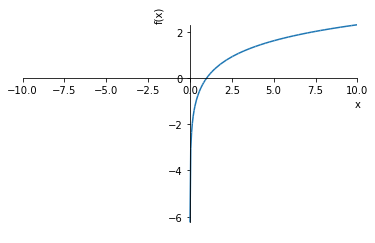

In [12]:
plot(sympy.log( Symbol('x')) )

In [95]:
m_test = 2  # total number of examples, m 
y_test = np.random.randint(2, size=m_test)
y_predicted_test = np.ones(m_test)*0.8
print(y_test)
print(y_predicted_test)

[1 0]
[ 0.8  0.8]


In [96]:
-(y_test*np.log(y_predicted_test)+(1.-y_test)*np.log(1.-y_predicted_test)).mean()

0.91629073187415511

In [97]:
y_test = theano.shared(y_test.astype(theano.config.floatX))
y_predicted_test = theano.shared(y_predicted_test.astype(theano.config.floatX))

In [98]:
J_binary = T.nnet.binary_crossentropy(y_predicted_test, y_test).mean()
J_categorical = T.nnet.categorical_crossentropy(y_predicted_test, y_test).mean()

In [99]:
print( theano.function( inputs=[], outputs=J_categorical)() )

0.223143551314


In [100]:
print( theano.function( inputs=[], outputs=J_binary)() )

0.916290731874


### making an example for categorical crossentropy

In [67]:
y3=np.zeros((m_test,3))

In [68]:
y3_predicted_cls = np.random.randint(3,size=m_test)
print(y3_predicted_cls)
for i in range(m_test):
    y3[i][y3_predicted_cls[i]] = 1.
print(y3)

[1 2]
[[ 0.  1.  0.]
 [ 0.  0.  1.]]


In [80]:
Kclses = 3
y3_predicted = np.array([np.random.dirichlet(np.ones(Kclses),size=1).flatten() for i in range(m_test)])
print(y3_predicted)

[[ 0.2914426   0.48511168  0.22344572]
 [ 0.69105175  0.22599138  0.08295687]]


In [76]:
y3_predicted[:,0].sum()

0.73285247918113439

In [77]:
y3[

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [85]:
-(y3[0][0]*np.log(y3_predicted[0][0])+(1-y3[0][0])*np.log(y3_predicted[0][np.arange(Kclses)!=0].sum()))

0.34452420410160056

In [83]:
y3_predicted[0][np.arange(Kclses)!=0].sum()

0.70855740198393524

In [88]:
categorical_results=[]
for i in range(m_test):
    example_row=[]
    for cls in range(Kclses):
        entropy= \
            (y3[i][cls]*np.log(y3_predicted[i][cls])+(1-y3[i][cls])*np.log(y3_predicted[i][np.arange(Kclses)!=cls].sum()))
        example_row.append(-entropy)
    categorical_results.append(example_row)
categorical_results = np.array( categorical_results )

In [89]:
categorical_results

array([[ 0.3445242 ,  0.72337615,  0.25288874],
       [ 1.17458149,  0.25617226,  2.48943439]])

In [90]:
categorical_results.sum(1)

array([ 1.32078909,  3.92018814])

In [91]:
categorical_results.sum(1).mean()

2.6204886194141581

In [92]:
y3_test=theano.shared(y3.astype(theano.config.floatX))
y3_predicted_test=theano.shared(y3_predicted.astype(theano.config.floatX))

In [93]:
J_categorical=T.nnet.categorical_crossentropy(y3_predicted_test,y3_test).mean()

In [94]:
print( theano.function(inputs=[],outputs=J_categorical)() )

1.60640527128
